In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [15]:
#load the fMNIST dataset
mnist = tf.keras.datasets.mnist

In [16]:
#load the training and test split of the fashion mnist dataset
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [17]:
print(training_labels)

[5 0 4 ... 5 6 8]


Label: 5

Image pixel array:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 

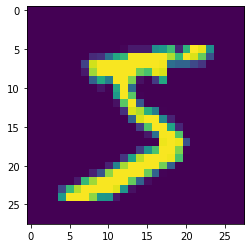

In [18]:
index = 0
#set number of characters per row when printing
np.set_printoptions(linewidth = 320)
#print the label and image
print(f'Label: {training_labels[index]}')
print(f'\nImage pixel array:\n {training_images[index]}')

#visualize the image
plt.imshow(training_images[index])

In [19]:
training_images = training_images/255.0
test_images = test_images/255.0

In [20]:
print(training_images[index])

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        

In [21]:
# build the classification model 
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1024, activation = tf.nn.relu), 
                                     tf.keras.layers.Dense(10, activation = tf.nn.softmax)])


In [23]:
# Build model
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0820 - accuracy: 0.9747
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0428 - accuracy: 0.9859
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0286 - accuracy: 0.9910
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0226 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0194 - accuracy: 0.9934


In [24]:
#evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0684 - accuracy: 0.9811


[0.06841471046209335, 0.9811000227928162]

In [25]:
classification = model.predict(test_images)
print(classification[1])
print(test_labels[1])

[3.6032032e-12 5.3285356e-07 9.9999952e-01 1.1691515e-11 9.0521974e-20 3.7329022e-11 1.5349137e-11 2.4525310e-16 6.0224326e-12 1.3255012e-16]
2


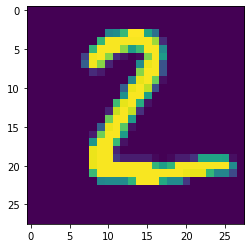

In [26]:
plt.imshow(test_images[1])